In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

print(project_root)

importmachine_learning.files_lib as FL
importmachine_learning.ml_lib as ML
import data_preprocessing.utils as utils
from data_extractor.data_extractor import load_df, extract_X_y_from_df 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json

/Users/gsk/documents/neuron/lie-detector-ai


In [4]:
df = load_df("../../data/")
# Filter the data and add the column 'label' depends what you need
df = df.query("desired_answer == answer and data_type in ['REAL', 'FAKE']")
df['label'] = df.apply(lambda x: 1 if x.block_no in [1,3] else 0, axis = 1)
df.head()

Opening raw data file ../../data/1299BF1A/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 70174 =      0.000 ...   280.696 secs
Ready.
Reading 0 ... 70174  =      0.000 ...   280.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass,

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label
1,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
2,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
3,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
4,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
6,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1


In [5]:
X,y = extract_X_y_from_df(df)

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data()
/Users/gsk/documents/neuron/lie-detector-ai/data_extractor/data_extractor.py:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  eeg = row['eeg'].get_data(

0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

In [14]:
from datetime import datetime


param_grid = [
    {
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'sag'],
        'classifier__C': [0.01, 0.1, 1.0, 10.0],
        'classifier__fit_intercept': [True, False],
    },
    {
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear'],
        'classifier__C': [0.01, 0.1, 1.0, 10.0],
        'classifier__fit_intercept': [True, False],
    },
    {
        'classifier__penalty': ['elasticnet'],
        'classifier__solver': ['saga'],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__l1_ratio': [0.5],
        'classifier__fit_intercept': [True],
    },
    {
        'classifier__penalty': ['none'],
        'classifier__solver': ['lbfgs', 'sag'],
        'classifier__fit_intercept': [True, False],
    }
]


result_folder = f"../results/logistic_regression_{datetime.now().strftime('%Y-%m-%d_%H:%M:%S')}/"

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  19.4s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  19.0s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  19.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  19.5s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  19.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  20.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  19.9s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  20.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  20.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  20.1s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  21.1s
[CV] END classifier__C=0.01, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  21.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  20.2s
[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  20.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  20.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  20.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  21.4s
[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  22.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  21.3s
[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  22.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  23.1s
[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  21.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  21.8s
[CV] END classifier__C=0.01, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  22.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  22.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  21.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  22.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  23.6s
[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  23.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  23.4s
[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  23.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  24.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.1s
[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.6s
[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=0.1, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.3s
[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.6s
[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.3s
[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  25.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  25.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  26.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window

[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  23.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  25.2s
[CV] END classifier__C=1.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  25.3s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.0s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  24.2s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  23.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  23.9s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  25.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window

[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  27.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  25.6s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  26.4s
[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  27.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=1.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  27.1s
[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  25.5s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  25.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  25.7s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window

[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=lbfgs; total time=  28.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  29.8s
[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  29.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  30.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  30.1s
[CV] END classifier__C=10.0, classifier__fit_intercept=True, classifier__penalty=l2, classifier__solver=sag; total time=  30.1s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  28.4s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  27.8s


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 

[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  40.8s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  41.3s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=lbfgs; total time=  41.4s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  43.4s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  43.7s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  43.4s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, classifier__solver=sag; total time=  43.6s
[CV] END classifier__C=10.0, classifier__fit_intercept=False, classifier__penalty=l2, class

/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Results saved to ../results/logistic_regression_eeg_2024-10-14_20:37:46/result_LogisticRegression_grid_search_logistic_regression_eeg_5fold_1728931560.json
Model saved to ../results/logistic_regression_eeg_2024-10-14_20:37:46/LogisticRegression_best_model_1728931560.joblib


AttributeError: module 'datetime' has no attribute 'now'

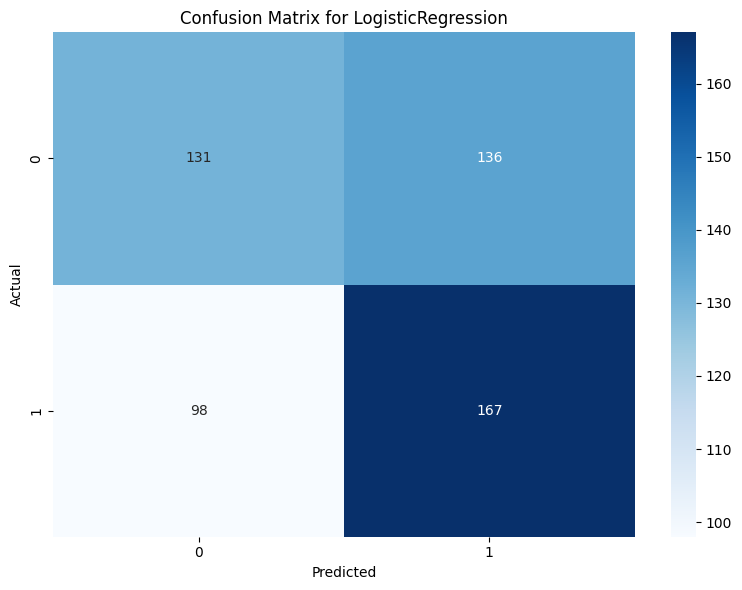

In [15]:
# Invoke the function
best_model, best_params, test_score = ML.grid_search_logistic_regression_eeg(
    X,
    y,
    param_grid[0],
    test_size=0.2,
    cv=5,
    scoring='accuracy',
    random_state=42
)

In [10]:
X.shape, y.shape

((2656, 16, 251), (2656,))

In [ ]:
from sklearn.linear_model import Ridge

param_grid_2 = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'regressor__fit_intercept': [True, False],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Different solvers for optimization
}


In [ ]:
from sklearn.linear_model import LinearRegression

best_model_2, best_params_2, test_score_2 = ML.grid_search_linear_regression_eeg(
    X, y, param_grid_2, test_size=0.2, cv=5, scoring='neg_mean_squared_error', 
    result_folder=result_folder,
)
